In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'acc':[],
           'f1':[],
           'r':[]}

In [4]:
ranks = [4,8,16,32]
lora_alpha = 8
lora_dropout = 0.0
lr = 1.0e-5
wd = 0.0

for r in ranks:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Weight decay {wd}. Lora rank: {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=lora_alpha,
                                dropout=lora_dropout)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['r'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search microsoft/deberta-base, lr: 1e-05. Weight decay 0.0. Lora rank: 4


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.6838	Val Loss:	0.6745	Accuracy:	0.7396	F1:	0.4252
2 / 10: Train Loss:	0.6634	Val Loss:	0.6555	Accuracy:	0.7396	F1:	0.4252
3 / 10: Train Loss:	0.6469	Val Loss:	0.6396	Accuracy:	0.7396	F1:	0.4252
4 / 10: Train Loss:	0.6317	Val Loss:	0.6261	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.6838	Val Loss:	0.6745	Accuracy:	0.7396	F1:	0.4252
2 / 10: Train Loss:	0.6635	Val Loss:	0.6556	Accuracy:	0.7396	F1:	0.4252
3 / 10: Train Loss:	0.6470	Val Loss:	0.6397	Accuracy:	0.7396	F1:	0.4252
4 / 10: Train Loss:	0.6320	Val Loss:	0.6264	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.6838	Val Loss:	0.6745	Accuracy:	0.7396	F1:	0.4252
2 / 10: Train Loss:	0.6635	Val Loss:	0.6556	Accuracy:	0.7396	F1:	0.4252
3 / 10: Train Loss:	0.6470	Val Loss:	0.6397	Accuracy:	0.7396	F1:	0.4252
4 / 10: Train Loss:	0.6320	Val Loss:	0.6263	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.6838	Val Loss:	0.6745	Accuracy:	0.7396	F1:	0.4252
2 / 10: Train Loss:	0.6635	Val Loss:	0.6556	Accuracy:	0.7396	F1:	0.4252
3 / 10: Train Loss:	0.6470	Val Loss:	0.6397	Accuracy:	0.7396	F1:	0.4252
4 / 10: Train Loss:	0.6319	Val Loss:	0.6263	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

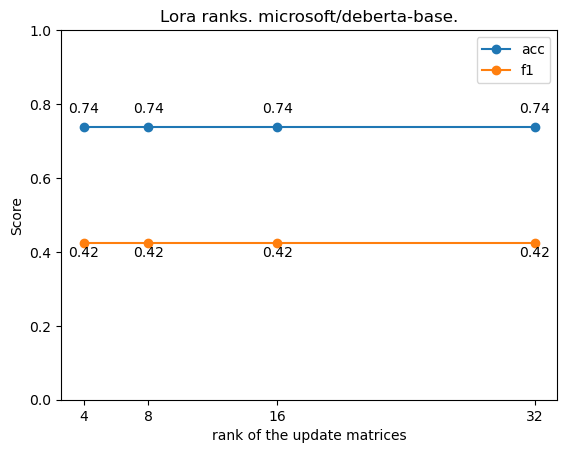

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='r', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["r"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["r"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['r'], [val for val in df['r']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('rank of the update matrices')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Lora ranks. {model_checkpoint}.')